In [9]:
#libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score

In [10]:
df = pd.read_csv("Personality.csv")

In [11]:
features = {
    'movie_preferences' : ['Action', 'Comedy', 'Mystery', 'Science Fiction'],
    'social_media_activity' : ['Lifestyle', 'Food', 'Fashion', 'Fitness', 'Games'],
    'reading_habits' : ['Novels', 'Short Stories','Comics'],
    'favorite_leisure_activities' : ['Drawing', 'Reading', 'Sports', 'Gaming'],
    'music_taste' : ['Rap', 'Jazz', 'Classical', 'EDM'], 
    'fashion_style' : ['Casual', 'Classic', 'Vintage', 'Sporty'],
    'travel_preferences' : ['Adventure', 'Road Trips', 'Solo Travel', 'Family Holidays']
}

label_encoders = {}
for feature in features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

In [12]:
# Split data into features and target
X = df.drop(columns=['personality_behaviour'])
y = df['personality_behaviour']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [14]:
# Train logistic regression classifier
logistic_classifier = LogisticRegression(random_state=42, class_weight='balanced')
logistic_classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [15]:
# Predict personality behaviours
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5026666666666667


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Complex       0.70      0.51      0.59      2093
   Versatile       0.30      0.50      0.38       907

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.58      0.50      0.52      3000



<Axes: >

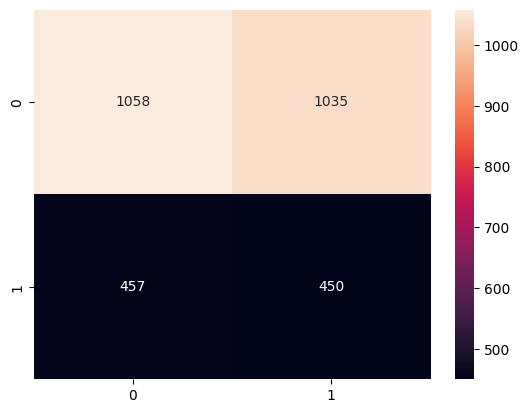

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [18]:
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1058 1035]
 [ 457  450]]
Accuracy :  0.5026666666666667
Sensitivity :  0.5054945054945055
Specificity :  0.4961411245865491


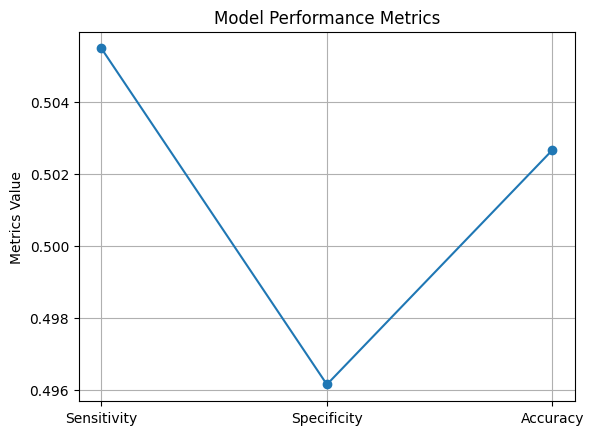

In [19]:
plt.plot(['Sensitivity', 'Specificity', 'Accuracy'], [sensitivity1, specificity1, accuracy], marker='o')

# Adding labels and title
plt.title('Model Performance Metrics')
plt.ylabel('Metrics Value')

# Display the plot
plt.grid(True)
plt.show()

In [20]:
print("F1-Score: ", f1_score(y_test, y_pred, average="weighted"))
print("Precision Score: ", precision_score(y_test, y_pred, average="weighted"))
print("Recall Score: ", recall_score(y_test, y_pred, average="weighted"))

F1-Score:  0.5229178908754731
Precision Score:  0.5788315631563157
Recall Score:  0.5026666666666667
